# DeapSECURE Deep Learning Pilot Workshop

August 11-12, 2025

Day 1, Episode 5: "Classifying Smartphone Apps with Keras"

https://deapsecure.gitlab.io/deapsecure-lesson04-nn/24-keras-classify/index.html

In [1]:
import os
import sys


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Tools for machine learning:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# for evaluating model performance
from sklearn.metrics import accuracy_score, confusion_matrix
# classic machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


# Tools for deep learning:
import tensorflow as tf
import tensorflow.keras as keras


# Import key Keras objects
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [2]:
df = pd.read_csv("sherlock/sherlock_18apps.csv", index_col=0)

In [3]:
df

,ApplicationName,CPU_USAGE,UidRxBytes,UidRxPackets,UidTxBytes,UidTxPackets,cutime,guest_time,importance,lru,num_threads,otherPrivateDirty,priority,rss,state,stime,utime,vsize,cminflt
0,Gmail,0.13,0,0,0,0,0.0,0.0,400,15,32.0,8300,20.0,10957.0,S,180.0,311.0,2.064265e+09,NaN
6,Hangouts,1.65,0,0,0,0,0.0,0.0,400,15,17.0,27284,20.0,20043.0,S,67.0,210.0,2.047980e+09,NaN
11,Messenger,0.21,0,0,0,0,0.0,0.0,300,0,72.0,11324,20.0,13891.0,S,395.0,542.0,2.106794e+09,NaN
18,Geo News,0.03,0,0,0,0,0.0,0.0,300,0,14.0,860,20.0,5694.0,S,43.0,39.0,1.893417e+09,NaN
19,Facebook,0.20,0,0,0,0,0.0,0.0,300,0,77.0,5776,20.0,8511.0,S,401.0,464.0,2.204619e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999984,Skype,1.79,0,0,0,0,0.0,0.0,400,15,31.0,12596,20.0,18691.0,S,78.0,84.0,1.999364e+09,NaN
999985,Hangouts,2.00,0,0,0,0,0.0,0.0,400,9,48.0,12760,20.0,7572.0,S,1090.0,2827.0,2.154717e+09,NaN
999989,Facebook,0.19,0,0,0,0,0.0,0.0,300,0,134.0,66296,20.0,28900.0,S,4038.0,4529.0,2.372964e+09,NaN
999991,Messenger,0.09,0,0,0,0,0.0,0.0,300,0,81.0,6556,20.0,9671.0,S,2293.0,1867.0,2.127880e+09,NaN


In [5]:
df.shape

(273129, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273129 entries, 0 to 999994
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ApplicationName    273129 non-null  object 
 1   CPU_USAGE          273077 non-null  float64
 2   UidRxBytes         273129 non-null  int64  
 3   UidRxPackets       273129 non-null  int64  
 4   UidTxBytes         273129 non-null  int64  
 5   UidTxPackets       273129 non-null  int64  
 6   cutime             273077 non-null  float64
 7   guest_time         273077 non-null  float64
 8   importance         273129 non-null  int64  
 9   lru                273129 non-null  int64  
 10  num_threads        273077 non-null  float64
 11  otherPrivateDirty  273129 non-null  int64  
 12  priority           273077 non-null  float64
 13  rss                273077 non-null  float64
 14  state              273077 non-null  object 
 15  stime              273077 non-null  float64
 16  ut

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CPU_USAGE,273077.0,6.618322e-01,3.207833e+00,0.0,5.000000e-02,1.300000e-01,3.700000e-01,1.108900e+02
UidRxBytes,273129.0,3.922973e+02,3.693198e+04,-280.0,0.000000e+00,0.000000e+00,0.000000e+00,8.872786e+06
UidRxPackets,273129.0,4.204643e-01,2.790607e+01,-11.0,0.000000e+00,0.000000e+00,0.000000e+00,6.165000e+03
UidTxBytes,273129.0,2.454729e+02,2.977305e+04,-60.0,0.000000e+00,0.000000e+00,0.000000e+00,9.830372e+06
UidTxPackets,273129.0,3.878826e-01,2.420920e+01,-1.0,0.000000e+00,0.000000e+00,0.000000e+00,6.748000e+03
cutime,273077.0,3.279844e-01,1.768488e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01
guest_time,273077.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
importance,273129.0,3.139921e+02,8.891191e+01,100.0,3.000000e+02,3.000000e+02,4.000000e+02,4.000000e+02
lru,273129.0,4.712480e+00,6.348188e+00,0.0,0.000000e+00,0.000000e+00,1.100000e+01,1.600000e+01
num_threads,273077.0,3.928061e+01,2.682408e+01,2.0,1.700000e+01,3.000000e+01,5.500000e+01,1.410000e+02


In [10]:
app_frequencies = df['ApplicationName'].value_counts()
print('Total num of apps')
print(app_frequencies)

Total num of apps
Google App          60001
Chrome              28046
Facebook            20103
Geo News            19991
Messenger           19989
WhatsApp            19985
Photos              17382
ES File Explorer    16667
Gmail               16417
Calendar             8996
Moovit               8365
Waze                 8237
Hangouts             7608
YouTube              5173
Maps                 5159
Skype                4877
Moriarty             3616
Messages             2517
Name: ApplicationName, dtype: int64


In [11]:
df['cminflt']

0        NaN
6        NaN
11       NaN
18       NaN
19       NaN
          ..
999984   NaN
999985   NaN
999989   NaN
999991   NaN
999994   NaN
Name: cminflt, Length: 273129, dtype: float64

In [12]:
df['guest_time']

0         0.0
6         0.0
11        0.0
18        0.0
19        0.0
         ... 
999984    0.0
999985    0.0
999989    0.0
999991    0.0
999994    0.0
Name: guest_time, Length: 273129, dtype: float64

In [13]:
df['guest_time'].min()

0.0

In [14]:
df['guest_time'].max()

0.0

In [15]:
df2 = df.drop(['cminflt', 'guest_time'], axis=1)
df2.dropna(inplace=True)

In [16]:
df2.shape

(273077, 17)

In [17]:
df2

,ApplicationName,CPU_USAGE,UidRxBytes,UidRxPackets,UidTxBytes,UidTxPackets,cutime,importance,lru,num_threads,otherPrivateDirty,priority,rss,state,stime,utime,vsize
0,Gmail,0.13,0,0,0,0,0.0,400,15,32.0,8300,20.0,10957.0,S,180.0,311.0,2.064265e+09
6,Hangouts,1.65,0,0,0,0,0.0,400,15,17.0,27284,20.0,20043.0,S,67.0,210.0,2.047980e+09
11,Messenger,0.21,0,0,0,0,0.0,300,0,72.0,11324,20.0,13891.0,S,395.0,542.0,2.106794e+09
18,Geo News,0.03,0,0,0,0,0.0,300,0,14.0,860,20.0,5694.0,S,43.0,39.0,1.893417e+09
19,Facebook,0.20,0,0,0,0,0.0,300,0,77.0,5776,20.0,8511.0,S,401.0,464.0,2.204619e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999984,Skype,1.79,0,0,0,0,0.0,400,15,31.0,12596,20.0,18691.0,S,78.0,84.0,1.999364e+09
999985,Hangouts,2.00,0,0,0,0,0.0,400,9,48.0,12760,20.0,7572.0,S,1090.0,2827.0,2.154717e+09
999989,Facebook,0.19,0,0,0,0,0.0,300,0,134.0,66296,20.0,28900.0,S,4038.0,4529.0,2.372964e+09
999991,Messenger,0.09,0,0,0,0,0.0,300,0,81.0,6556,20.0,9671.0,S,2293.0,1867.0,2.127880e+09


In [18]:
labels = df2['ApplicationName']

In [19]:
df_features = df2.drop('ApplicationName', axis=1)

In [20]:
df_features

,CPU_USAGE,UidRxBytes,UidRxPackets,UidTxBytes,UidTxPackets,cutime,importance,lru,num_threads,otherPrivateDirty,priority,rss,state,stime,utime,vsize
0,0.13,0,0,0,0,0.0,400,15,32.0,8300,20.0,10957.0,S,180.0,311.0,2.064265e+09
6,1.65,0,0,0,0,0.0,400,15,17.0,27284,20.0,20043.0,S,67.0,210.0,2.047980e+09
11,0.21,0,0,0,0,0.0,300,0,72.0,11324,20.0,13891.0,S,395.0,542.0,2.106794e+09
18,0.03,0,0,0,0,0.0,300,0,14.0,860,20.0,5694.0,S,43.0,39.0,1.893417e+09
19,0.20,0,0,0,0,0.0,300,0,77.0,5776,20.0,8511.0,S,401.0,464.0,2.204619e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999984,1.79,0,0,0,0,0.0,400,15,31.0,12596,20.0,18691.0,S,78.0,84.0,1.999364e+09
999985,2.00,0,0,0,0,0.0,400,9,48.0,12760,20.0,7572.0,S,1090.0,2827.0,2.154717e+09
999989,0.19,0,0,0,0,0.0,300,0,134.0,66296,20.0,28900.0,S,4038.0,4529.0,2.372964e+09
999991,0.09,0,0,0,0,0.0,300,0,81.0,6556,20.0,9671.0,S,2293.0,1867.0,2.127880e+09


In [21]:
labels

0             Gmail
6          Hangouts
11        Messenger
18         Geo News
19         Facebook
            ...    
999984        Skype
999985     Hangouts
999989     Facebook
999991    Messenger
999994     Geo News
Name: ApplicationName, Length: 273077, dtype: object

In [22]:
df_labels_onehot = pd.get_dummies(labels)

In [23]:
df_labels_onehot

,Calendar,Chrome,ES File Explorer,Facebook,Geo News,Gmail,Google App,Hangouts,Maps,Messages,Messenger,Moovit,Moriarty,Photos,Skype,Waze,WhatsApp,YouTube
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
18,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
19,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999984,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
999985,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
999989,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
999991,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [26]:
df_features = pd.get_dummies(df_features)

In [27]:
df_features

,CPU_USAGE,UidRxBytes,UidRxPackets,UidTxBytes,UidTxPackets,cutime,importance,lru,num_threads,otherPrivateDirty,priority,rss,stime,utime,vsize,state_D,state_R,state_S,state_Z
0,0.13,0,0,0,0,0.0,400,15,32.0,8300,20.0,10957.0,180.0,311.0,2.064265e+09,0,0,1,0
6,1.65,0,0,0,0,0.0,400,15,17.0,27284,20.0,20043.0,67.0,210.0,2.047980e+09,0,0,1,0
11,0.21,0,0,0,0,0.0,300,0,72.0,11324,20.0,13891.0,395.0,542.0,2.106794e+09,0,0,1,0
18,0.03,0,0,0,0,0.0,300,0,14.0,860,20.0,5694.0,43.0,39.0,1.893417e+09,0,0,1,0
19,0.20,0,0,0,0,0.0,300,0,77.0,5776,20.0,8511.0,401.0,464.0,2.204619e+09,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999984,1.79,0,0,0,0,0.0,400,15,31.0,12596,20.0,18691.0,78.0,84.0,1.999364e+09,0,0,1,0
999985,2.00,0,0,0,0,0.0,400,9,48.0,12760,20.0,7572.0,1090.0,2827.0,2.154717e+09,0,0,1,0
999989,0.19,0,0,0,0,0.0,300,0,134.0,66296,20.0,28900.0,4038.0,4529.0,2.372964e+09,0,0,1,0
999991,0.09,0,0,0,0,0.0,300,0,81.0,6556,20.0,9671.0,2293.0,1867.0,2.127880e+09,0,0,1,0


In [28]:
print("Step: Feature scaling with StandardScaler")


# keep the unscaled feature matrix under a different name:
df_features_unscaled = df_features
scaler = preprocessing.StandardScaler()
scaler.fit(df_features_unscaled)


# Recast the features still in a dataframe form
df_features = pd.DataFrame(scaler.transform(df_features_unscaled),
                           columns=df_features_unscaled.columns,
                           index=df_features_unscaled.index)
print("After scaling:")
print(df_features.head(10))


Step: Feature scaling with StandardScaler
After scaling:
    CPU_USAGE  UidRxBytes  UidRxPackets  UidTxBytes  UidTxPackets    cutime  \
0   -0.165792   -0.010623     -0.015068   -0.008245     -0.016022 -0.185461   
6    0.308049   -0.010623     -0.015068   -0.008245     -0.016022 -0.185461   
11  -0.140853   -0.010623     -0.015068   -0.008245     -0.016022 -0.185461   
18  -0.196966   -0.010623     -0.015068   -0.008245     -0.016022 -0.185461   
19  -0.143970   -0.010623     -0.015068   -0.008245     -0.016022 -0.185461   
28  -0.047332   -0.003421      0.092426   -0.001260      0.149189 -0.185461   
29  -0.196966   -0.010623     -0.015068   -0.008245     -0.016022 -0.185461   
32  -0.200083   -0.010623     -0.015068   -0.008245     -0.016022 -0.185461   
35  -0.181379   -0.010623     -0.015068   -0.008245     -0.016022 -0.185461   
39  -0.206318   -0.010623     -0.015068   -0.008245     -0.016022 -0.185461   

    importance       lru  num_threads  otherPrivateDirty  priority       

In [29]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273077 entries, 0 to 999994
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CPU_USAGE          273077 non-null  float64
 1   UidRxBytes         273077 non-null  float64
 2   UidRxPackets       273077 non-null  float64
 3   UidTxBytes         273077 non-null  float64
 4   UidTxPackets       273077 non-null  float64
 5   cutime             273077 non-null  float64
 6   importance         273077 non-null  float64
 7   lru                273077 non-null  float64
 8   num_threads        273077 non-null  float64
 9   otherPrivateDirty  273077 non-null  float64
 10  priority           273077 non-null  float64
 11  rss                273077 non-null  float64
 12  stime              273077 non-null  float64
 13  utime              273077 non-null  float64
 14  vsize              273077 non-null  float64
 15  state_D            273077 non-null  float64
 16  st

Now split the data into training data and validation data

In [30]:
val_size = 0.2

In [31]:
random_state = 34

In [32]:
train_features, val_features, train_L_onehot, val_L_onehot = \
    train_test_split(df_features, df_labels_onehot, test_size=val_size, random_state=random_state)

In [33]:
train_features.shape

(218461, 19)

In [34]:
val_features.shape

(54616, 19)

Now the data is ready for ML

In [35]:
model = Sequential([
    Dense(18, activation='softmax', input_shape=(19,), kernel_initializer='random_normal') 
])

2025-08-11 16:31:39.488001: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-08-11 16:31:39.488045: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (e3-w6420b-03): /proc/driver/nvidia/version does not exist
2025-08-11 16:31:39.513235: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [36]:
adam_opt = Adam(learning_rate=0.0003, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [38]:
model.compile(optimizer=adam_opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 18)                360       
Total params: 360
Trainable params: 360
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(train_features, train_L_onehot, epochs=5, batch_size=32, \
                    validation_data=(val_features, val_L_onehot))

2025-08-11 16:41:54.027770: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
6827/6827 [==============================] - 8s 1ms/step - loss: 1.6942 - accuracy: 0.5595 - val_loss: 1.2647 - val_accuracy: 0.6784
Epoch 2/5
6827/6827 [==============================] - 7s 991us/step - loss: 1.1145 - accuracy: 0.7264 - val_loss: 1.0078 - val_accuracy: 0.7684
Epoch 3/5
6827/6827 [==============================] - 7s 992us/step - loss: 0.9297 - accuracy: 0.7830 - val_loss: 0.8737 - val_accuracy: 0.7913
Epoch 4/5
6827/6827 [==============================] - 7s 990us/step - loss: 0.8203 - accuracy: 0.8029 - val_loss: 0.7860 - val_accuracy: 0.8080
Epoch 5/5
6827/6827 [==============================] - 7s 979us/step - loss: 0.7458 - accuracy: 0.8169 - val_loss: 0.7238 - val_accuracy: 0.8220


In [41]:
history

In [42]:
history.history

{'loss': [1.6941916942596436,
  1.1144640445709229,
  0.9297420382499695,
  0.8202800750732422,
  0.7458407878875732],
 'accuracy': [0.5595323443412781,
  0.7264317274093628,
  0.7829955816268921,
  0.8029488325119019,
  0.8168734908103943],
 'val_loss': [1.2646604776382446,
  1.0077708959579468,
  0.8736591935157776,
  0.7859889268875122,
  0.7237829566001892],
 'val_accuracy': [0.6783543229103088,
  0.7684378027915955,
  0.7912699580192566,
  0.8080415725708008,
  0.8220118880271912]}

In [43]:
def plot_loss(model_history):
    '''Plots the values of the loss function for the training
    and validation datasets.
    '''
    epochs = np.array(model_history.epoch)
    plt.plot(epochs, model_history.history['loss'])
    plt.plot(epochs+1, model_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    fig = plt.gcf()
    plt.show()
    return fig

def plot_acc(model_history):
    '''Plots the values of the accuracy for the training
    and validation datasets.
    '''
    epochs = np.array(model_history.epoch)
    plt.plot(epochs, model_history.history['accuracy'])
    plt.plot(epochs+1, model_history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    fig = plt.gcf()
    plt.show()
    return fig

In [45]:
%matplotlib inline


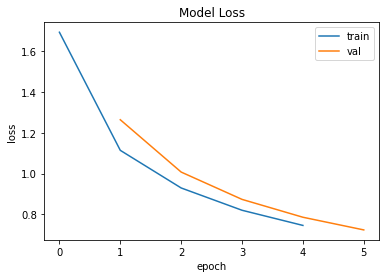

In [46]:
fig_loss = plot_loss(history)

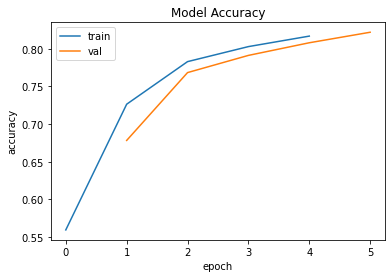

In [48]:
fig_acc = plot_acc(history)

In [49]:
history2 = model.fit(train_features, train_L_onehot, epochs=95, batch_size=32, \
                     validation_data=(val_features, val_L_onehot))

Epoch 1/95
6827/6827 [==============================] - 7s 979us/step - loss: 0.6906 - accuracy: 0.8271 - val_loss: 0.6756 - val_accuracy: 0.8293
Epoch 2/95
6827/6827 [==============================] - 7s 978us/step - loss: 0.6479 - accuracy: 0.8378 - val_loss: 0.6384 - val_accuracy: 0.8401
Epoch 3/95
6827/6827 [==============================] - 7s 983us/step - loss: 0.6136 - accuracy: 0.8556 - val_loss: 0.6079 - val_accuracy: 0.8687
Epoch 4/95
6827/6827 [==============================] - 7s 983us/step - loss: 0.5858 - accuracy: 0.8711 - val_loss: 0.5827 - val_accuracy: 0.8730
Epoch 5/95
6827/6827 [==============================] - 7s 983us/step - loss: 0.5622 - accuracy: 0.8769 - val_loss: 0.5613 - val_accuracy: 0.8803
Epoch 6/95
6827/6827 [==============================] - 7s 987us/step - loss: 0.5422 - accuracy: 0.8796 - val_loss: 0.5431 - val_accuracy: 0.8803
Epoch 7/95
6827/6827 [==============================] - 7s 986us/step - loss: 0.5252 - accuracy: 0.8820 - val_loss: 0.5276 -